In this notebook, we will 
- generate the molecular descriptors using the RDKIT pacakage
- clean features with the functions in the file Chemfunctions
- split and save the dataset into train and test datasets

In [83]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# import custom functions from the python file
import sys
sys.path.append('../')
import Chemfunctions as chemfun


# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# RDKit 
import rdkit.Chem as Chem

Download data from the github repo

In [84]:
url="https://raw.githubusercontent.com/akashjn/DataScience/main/Data/BTZ_5442mols_smiles_redpot.csv"
df=pd.read_csv(url)

Before moving ahead find any duplicate SMILES in the dataframe and remove it
- A molecule can be represented by more than one SMILES string, so let's re-write SMILES in the canonical (standard) form and remove any duplicate SMILES

In [85]:
df=chemfun.remove_duplicate_smiles(df=df,smi="SMILES")

Removed 0 duplicate SMILES from the given df


no duplicate SMILES found in the dataset

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5442 entries, 0 to 5441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  5442 non-null   object 
 1   ERed    5442 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.2+ KB


We have two columns in the df
- SMILES strings and Redox potentials (ERed) of 5442 molecules 
- datatype of ERed is float64

Visaulize the distribution of ERed of 5442 molecules with boxplot and histogram

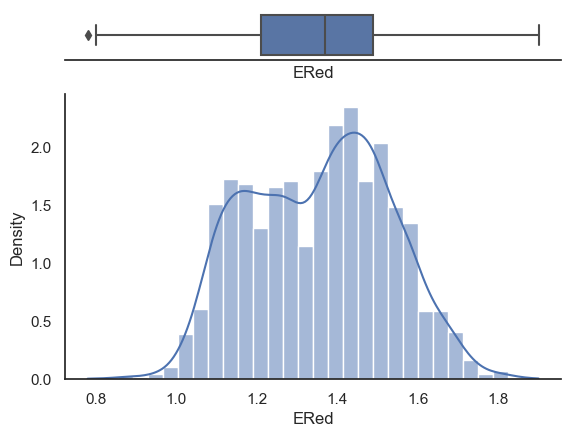

In [87]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df["ERed"], ax=ax_box)
sns.histplot(x=df["ERed"], bins=30, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

- From the boxplot and histogram, the ERed distibution is not normally distributed and it is slightly right skewed
- one outlier in the data

Generate descriptive statistics of ERed

In [88]:
df.ERed.describe()

count    5442.000000
mean        1.353532
std         0.176192
min         0.780000
25%         1.210000
50%         1.370000
75%         1.490000
max         1.900000
Name: ERed, dtype: float64

In the dataset, the mean, std and median ERed of 5442 molecules is 1.35, 0.18, and 1.37, respectively

# Feature Generation

**We will use the rdkit library to generate molecular descriptors**
- RDkit_descriptors() is a function in the Chemfunctions.py

In [89]:
# call function
Mol_descriptors,desc_names = chemfun.RDkit_descriptors(smiles=df.SMILES)
df_rdkit = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,4.456023,1.020889,4.456023,1.020889,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.300000,2.100000,2.850000,32.140682,10.056719,2.243910,-2.382209,2.387529,-2.421053,6.996096,0.412244,2.063612,621.296943,14.275656,12.550094,13.366590,9.575387,6.943478,7.673774,5.713135,6.241583,3.990306,4.532875,2.790050,3.370123,-1.40,50883.396945,13.577001,5.179478,2.226066,123.668114,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,27.085448,38.790149,23.102960,0.000000,34.136361,0.0,13.64699,0.0,6.923737,57.121861,11.629819,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.969031,0.000000,6.923737,5.563451,6.066367,0.0,11.033401,0.0,35.50,0.0,0.0,0.0,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,0.000000,8.854512,1.301269,7.048598,0.000000,5.955116,0.0,2.183519,0.000000,6.418928,6.404726,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,3,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.243940,0.748371,5.243940,0.748371,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.300000,2.100000,2.850000,32.140682,10.052673,2.253246,-2.390295,2.392744,-2.423841,6.996097,0.204850,2.122519,612.484865,14.112520,12.218235,13.034732,9.757550,7.005867,7.736164,5.060772,5.589220,3.984172,4.526742,2.920064,3.500137,-1.40,63046.529091,13.577001,5.535354,2.125124,123.021825,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,8.747

**Data Cleaning**

1. Remove columns with NaN
2. Remove duplicate columns
3. Remove columns with unique values
4. Remove columns with low std
5. Remove highly correlated features


In [90]:
print(f'Shape of the df_rdkit before cleaning: {df_rdkit.shape}')
df_rdkit=chemfun.remove_nan_columns(df=df_rdkit)
df_rdkit=chemfun.remove_duplicate_columns(df=df_rdkit)
df_rdkit=chemfun.remove_columns_uniquevalues(df=df_rdkit)
df_rdkit=chemfun.remove_columns_low_std(df=df_rdkit)
df_rdkit=chemfun.remove_corr_features(df=df_rdkit,corr_cutoff=0.9)
print(f'Shape of the df_rdkit after cleaning: {df_rdkit.shape}')

Shape of the df_rdkit before cleaning: (5442, 208)
Removed 0 columns with nan
Removed 0 duplicate columns
Removed 84 columns values with a unique value
Removed 27 columns with std < 0.3 
Dropped 38 features with correlation coeff. > 0.90
Shape of the df_rdkit after cleaning: (5442, 59)


*With some data cleaning operations we were able to reduce the number of descriptors from 208 to 59*

*we removed features with pearson corr. coeff. > 0.9 to remove the highly correlation features*

In [91]:
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MolWt,BCUT2D_MRLOW,BertzCT,Chi3n,Ipc,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA9,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA6,TPSA,EState_VSA1,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,NHOHCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumRotatableBonds,MolLogP,fr_NH0,fr_Ndealkylation1,fr_aryl_methyl,fr_bicyclic,fr_methoxy,fr_unbrch_alkane
0,4.456023,1.020889,291.424,0.412244,621.296943,3.990306,50883.396945,14.699729,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,27.085448,38.790149,23.102960,0.000000,34.136361,13.64699,0.0,6.923737,57.121861,11.629819,0.0,60.969031,0.000000,6.923737,6.066367,35.50,0.0,0.0,0.000000,37.212427,28.666411,0.000000,0.0,57.579929,7.048598,0.000000,5.955116,0.0,0.000000,6.418928,6.404726,0,0,1,1,3,1.81752,5,2,1,2,0,0
1,5.243940,0.748371,292.408,0.204850,612.484865,3.984172,63046.529091,14.536682,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,19.913841,38.852275,29.709842,4.736863,34.136361,8.74708,0.0,13.847474,49.695525,11.629819,0.0,48.642785,4.736863,6.923737,6.066367,41.49,0.0,0.0,0.000000,43.819309,28.666411,7.109798,0.0,38.460741,4.836841,0.000000,5.871127,0.0,0.000000,9.134667,1.753581,0,0,1,1,4,2.29242,4,1,1,2,1,0
2,4.487068,0.475834,291.424,0.656189,621.296943,3.855243,53230.799764,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26.837579,32.723782,28.790346,0.000000,39.823748,8.74708,0.0,26.813052,41.798549,6.066367,0.0,41.470862,0.000000,0.000000,6.066367,44.29,0.0,0.0,6.041841,36.355057,23.102960,0.000000,0.0,57.748939,4.777731,3.506019,5.643154,0.0,0.000000,9.584423,2.150651,1,0,1,1,3,2.78770,4,1,0,2,0,0
3,4.513689,0.897986,305.451,0.698384,623.796657,4.029118,104319.097411,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,6.923737,26.334663,32.723782,28.790346,0.000000,39.823748,8.74708,0.0,27.192033,47.840390,6.066367,0.0,41.470862,0.000000,0.000000,6.066367,44.29,0.0,0.0,0.000000,55.865391,23.102960,0.000000,0.0,50.701267,4.943843,3.533649,5.788754,0.0,1.157225,11.767929,0.000000,1,0,1,1,5,3.17940,4,1,0,2,0,0
4,4.512897,0.476118,305.451,0.643501,636.270840,4.100912,91642.042480,15.116608,11.033401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,33.761316,32.220866,28.790346,0.000000,39.823748,8.74708,0.0,33.736790,41.295634,6.066367,0.0,40.967946,0.000000,0.000000,6.066367,44.29,0.0,0.0,6.041841,42.899813,23.102960,0.000000,0.0,57.625004,4.922731,3.530111,5.724360,0.0,0.000000,12.885515,0.000000,1,0,1,1,4,3.17780,4,1,0,2,0,0


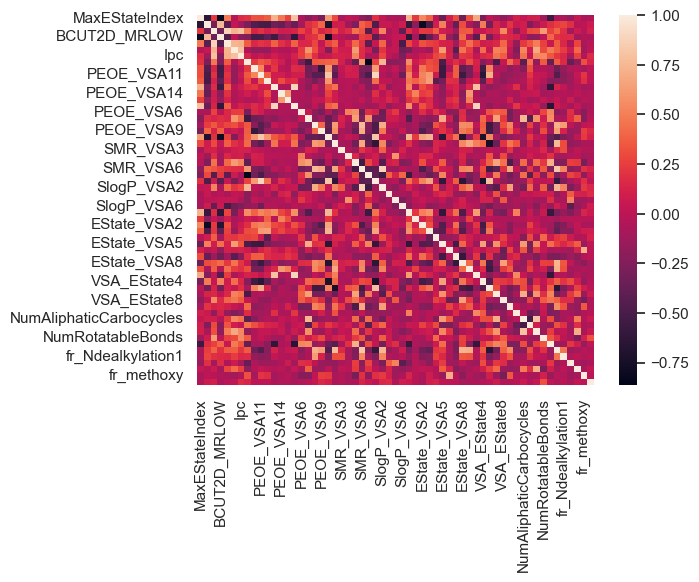

In [92]:
sns.heatmap(df_rdkit.corr())
plt.show()

**Let's find out which of the features have normal distribution with the statistical tests and visulaization**

In [93]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

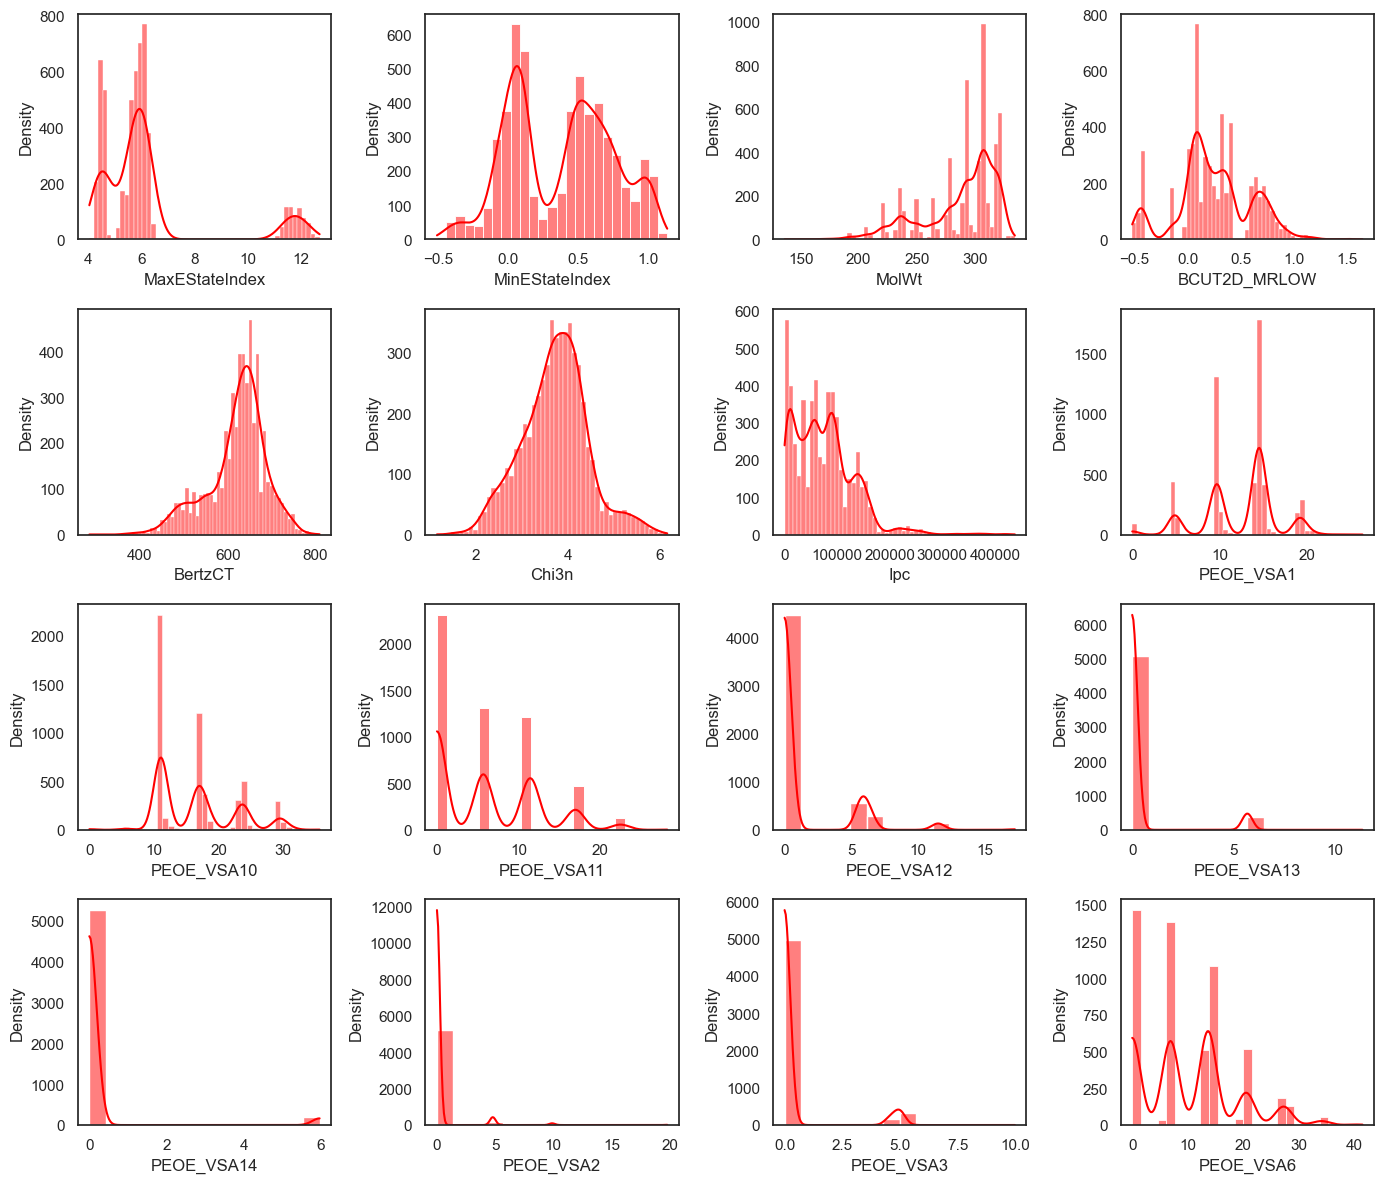

In [94]:
nr_rows = 4
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(df_rdkit.columns.to_list()):
            col=df_rdkit.columns.to_list()[i]
            sns.histplot(df_rdkit[col],ax=axs[r][c],color="red",kde=True)
            axs[r][c].set_xlabel(col)
            axs[r][c].set_ylabel(f'Density')
            # axs[r][c].set_title(col)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# # plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

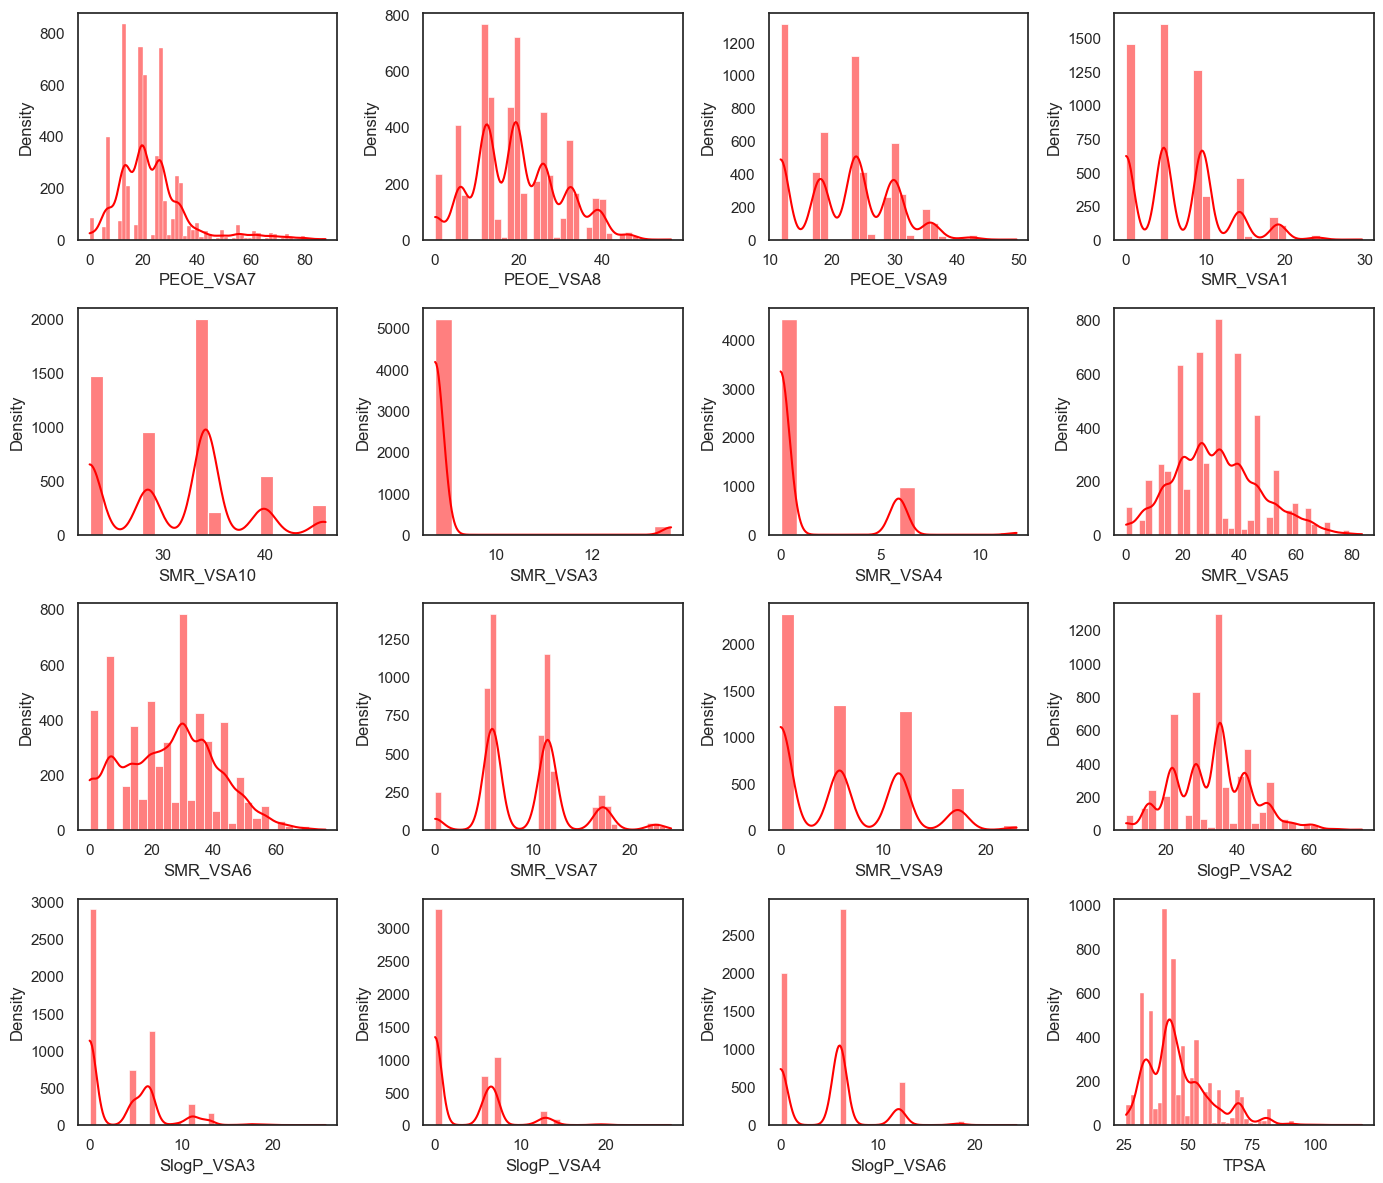

In [95]:
nr_rows = 4
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+nr_cols*nr_rows
        
        if i < len(df_rdkit.columns.to_list()):
            col=df_rdkit.columns.to_list()[i]
            sns.histplot(df_rdkit[col],ax=axs[r][c],color="red",kde=True)
            axs[r][c].set_xlabel(col)
            axs[r][c].set_ylabel(f'Density')
            # axs[r][c].set_title(col)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# # plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

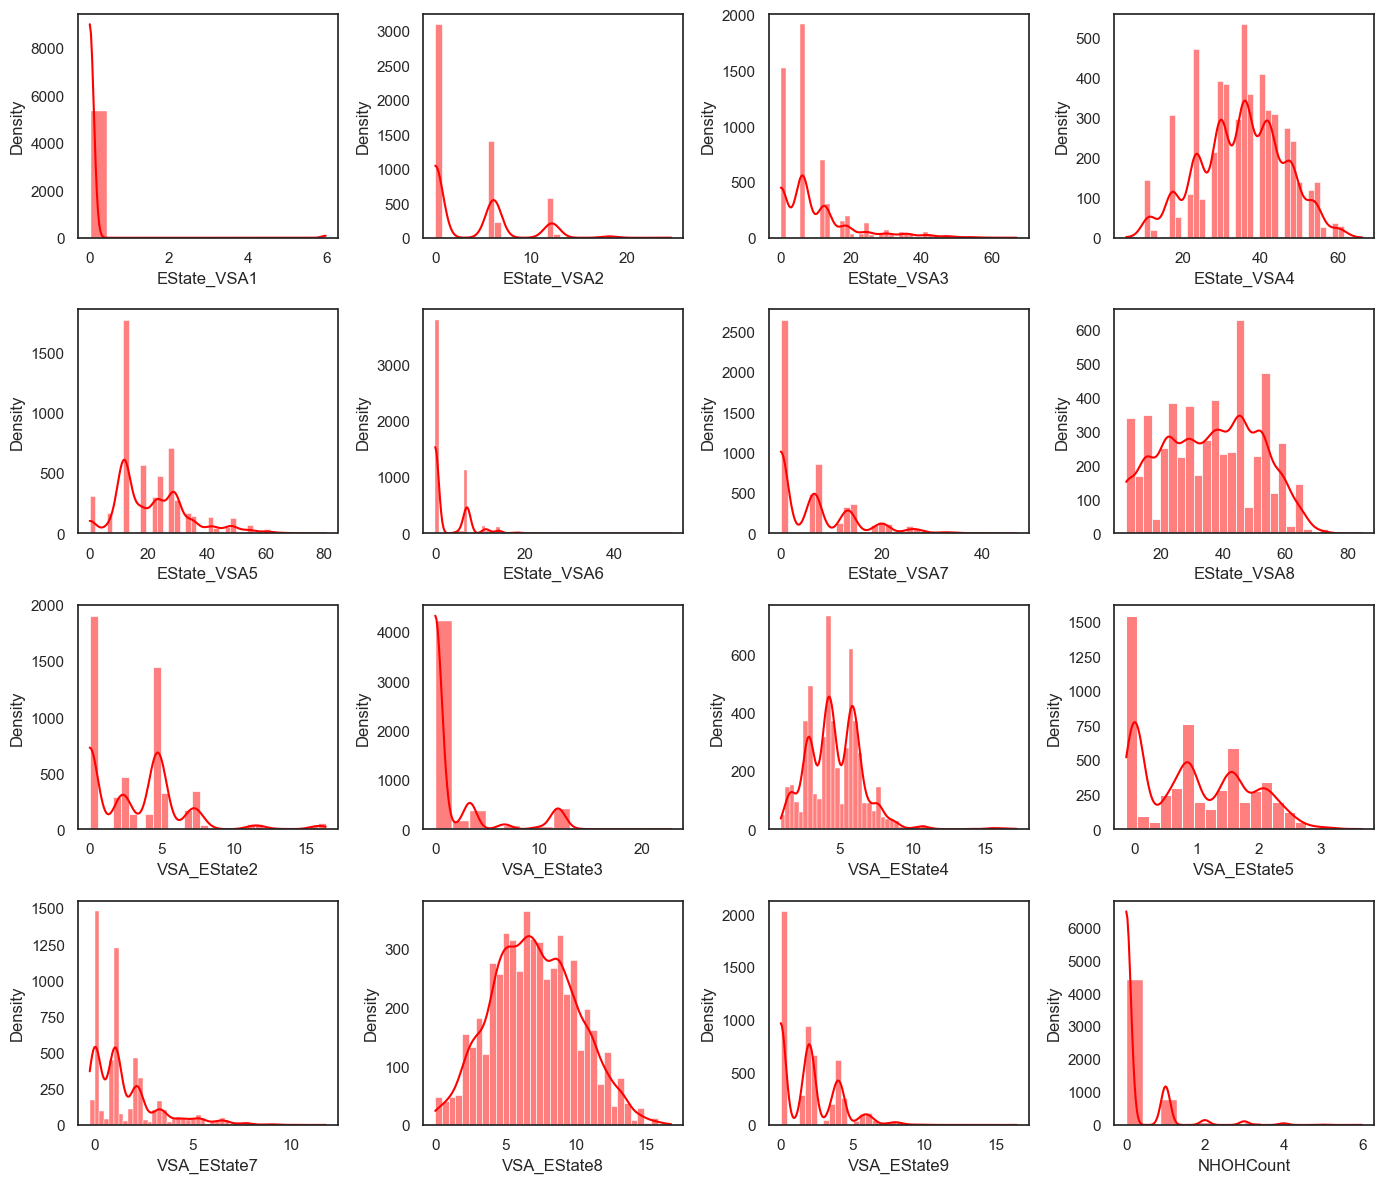

In [96]:
nr_rows = 4
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+nr_cols*nr_rows*2
        
        if i < len(df_rdkit.columns.to_list()):
            col=df_rdkit.columns.to_list()[i]
            sns.histplot(df_rdkit[col],ax=axs[r][c],color="red",kde=True)
            axs[r][c].set_xlabel(col)
            axs[r][c].set_ylabel(f'Density')
            # axs[r][c].set_title(col)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# # plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

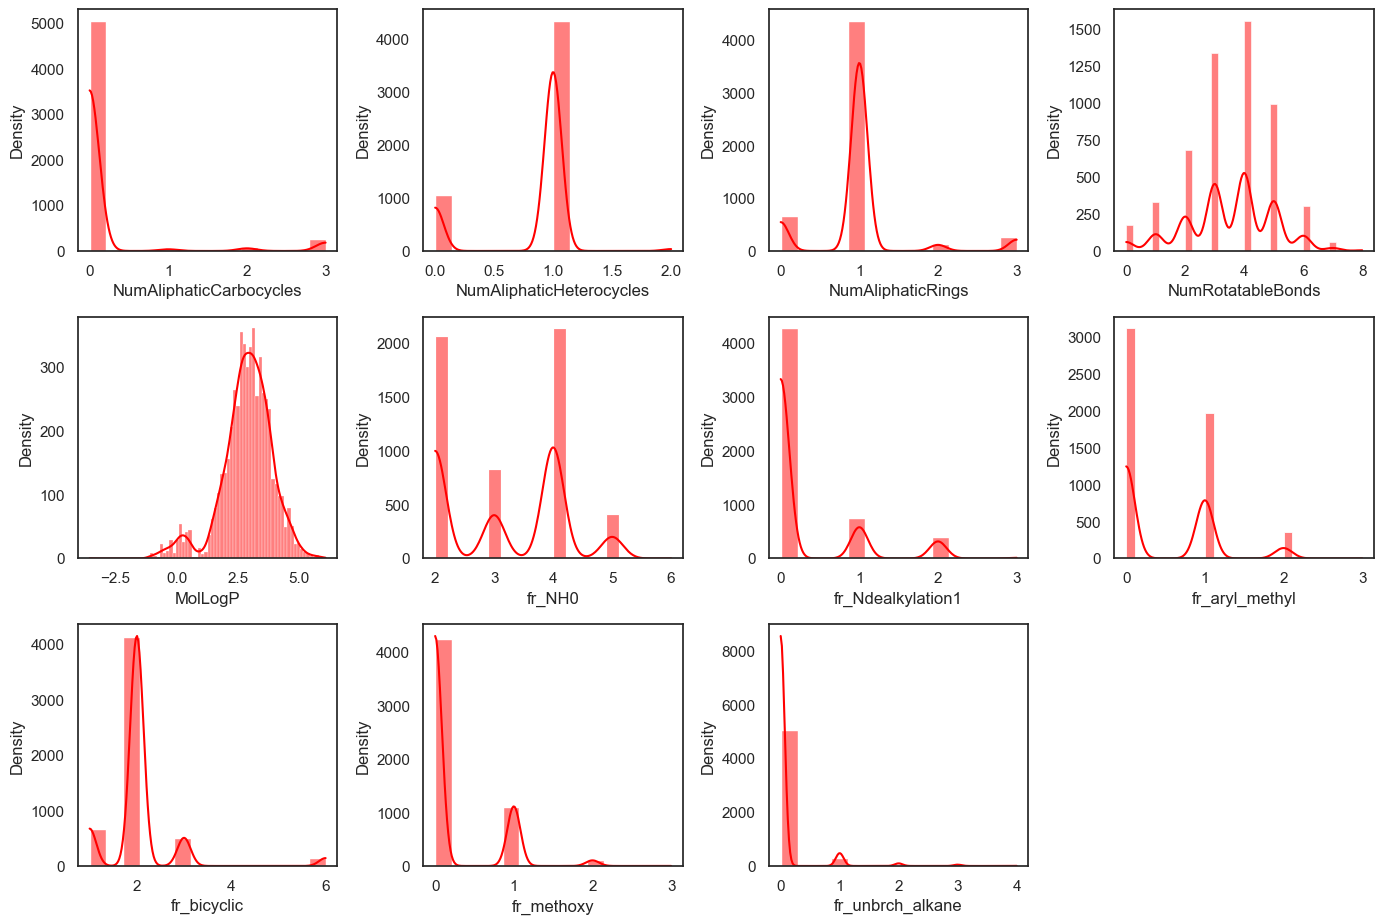

In [97]:
nr_rows = 4
nr_cols = 4
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+nr_cols*nr_rows*3
        
        if i < len(df_rdkit.columns.to_list()):
            col=df_rdkit.columns.to_list()[i]
            sns.histplot(df_rdkit[col],ax=axs[r][c],color="red",kde=True)
            axs[r][c].set_xlabel(col)
            axs[r][c].set_ylabel(f'Density')
            # axs[r][c].set_title(col)
        else:
            fig.delaxes(axs[r][c])
            
plt.tight_layout()    
# # plt.savefig("./Figures/Ered_desc2.png",dpi=300)
plt.show()  

None of the features look perfectly normally distributed from the hist/kde plots

In [98]:
# # To import the updated functions from the chemfun use following lines of code
# import importlib
# importlib.reload(chemfun)

## Let's try statistical tests

With statistical tests we will evaluate the null hypotheis using D'Agostino-Pearson, and Shapiro-Wilk tests.

**interpretation**
- alpha = 0.05 (95% confidence interval)
- H0 = features are normally distributed or Gaussian
- if p-value > alpha, then Sample looks Gaussian (fail to reject H0)
- else, Sample does not look Gaussian (reject H0)

In [99]:
df_=chemfun.check_normality_feat(df=df_rdkit,alpha=0.05,test="shapiro")
print(f'normally distributed features: ')
df_[df_["Normal_dist"]]

Shapiro-Wilk test of normality
0 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'W_stat', 'p-value'] columns
normally distributed features: 


c:\Users\jaina\Anaconda3\envs\datascience\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Feature,Normal_dist,W_stat,p-value


In [100]:
df_=chemfun.check_normality_feat(df=df_rdkit,alpha=0.05,test="agostino")
print(f'normally distributed features: ')
df_[df_["Normal_dist"]]

D'Agostino K2 test of normality
1 features are normally distributed
Returning a dataframe with ['Feature', 'Normal_dist', 'K2_stat', 'p-value'] columns
normally distributed features: 


,Feature,Normal_dist,K2_stat,p-value
3,BCUT2D_MRLOW,True,1.570792,0.455939


- From the shaprio tests, we find that none of the selected features are normally distributed
- From the agostino tests, we find that one of the selected features are normally distributed
- we can apply log, cubic root transform to features after training the linear reg. (baseline) model

**Split the dataset into training and test datasets**

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_rdkit,df["ERed"],test_size=0.3, random_state=42)
print(f'X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}, y_train.shape = {y_train.shape}, y_test.shape = {y_test.shape}')

X_train.shape = (3809, 59), X_test.shape = (1633, 59), y_train.shape = (3809,), y_test.shape = (1633,)


**Do standard scaling**

In [102]:
X_train,X_test=chemfun.do_scaling(xtrain=X_train,xtest=X_test)
# y_train=y_train.to_numpy()
# y_test=y_test.to_numpy()

returning scaled train and test data


In [104]:
X_train.to_csv(r'./Data/X_train_70pc_scaled.csv',index=False)
X_test.to_csv(r'./Data/X_test_30pc_scaled.csv',index=False)
y_train.to_csv(r'./Data/y_train_70pc_target.csv',index=False)
y_test.to_csv(r'./Data/y_test_30pc_target.csv',index=False)